# Finance Data Project

## getting data

**first you need to install pandas-datareader**  
```pip install pandas-datareader```

In [1]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
from pandas_datareader import data,wb

### Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

In [4]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [5]:
BAC = data.DataReader("BAC",'yahoo',start,end)
C = data.DataReader("C",'yahoo',start,end)
GS = data.DataReader("GS",'yahoo',start,end)
JPM = data.DataReader("JPM",'yahoo',start,end)
MS = data.DataReader("MS",'yahoo',start,end)
WFC = data.DataReader("WFC",'yahoo',start,end)


**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [35]:
tickers = ['BAC','C','GS','JPM','MS','WFC']
banks = [BAC,C,GS,JPM,MS,WFC]

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks=pd.concat(banks,axis=1,keys=tickers)

**Set the column name levels:**

In [8]:
bank_stocks.columns.names=['Bank','Stocks']

**Check the head of the bank_stocks dataframe.**

In [9]:
bank_stocks.head()

Bank              BAC                                                          \
Stocks           High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.942661   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.582169   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.625423   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.574959   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.596584   

Bank                 C                                      ...         MS  \
Stocks            High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

Bank                                               WFC                        \
Stocks          Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.864330  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.888931  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.987347  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.024258  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.405590  31.825001  31.555000  31.674999   

Bank                                          
Stocks          Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.353485  
2006-01-04  31.530001  10870000.0  20.117418  
2006-01-05  31.495001  10158000.0  20.095087  
2006-01-06  31.680000   8403800.0  20.213120  
2006-01-09  31.674999   5619600.0  20.209930  

[5 rows x 36 columns]

**What is the max Close price for each bank's stock throughout the time period?**

>use xs method of multilevel indexing

In [10]:
bank_stocks.xs(('BAC','Close'),axis=1)


Date
2006-01-03    47.080002
2006-01-04    46.580002
2006-01-05    46.639999
2006-01-06    46.570000
2006-01-09    46.599998
                ...    
2015-12-24    17.270000
2015-12-28    17.129999
2015-12-29    17.280001
2015-12-30    17.049999
2015-12-31    16.830000
Name: (BAC, Close), Length: 2517, dtype: float64

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.**

In [12]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [29]:
bank_stocks.iloc[:,9]

Date
2006-01-03    492.899994
2006-01-04    483.799988
2006-01-05    486.200012
2006-01-06    486.200012
2006-01-09    483.899994
                 ...    
2015-12-24     52.709999
2015-12-28     52.380001
2015-12-29     52.980000
2015-12-30     52.299999
2015-12-31     51.750000
Name: (C, Close), Length: 2517, dtype: float64

In [31]:
for i in range(3,35,6):
    returns[i] = bank_stocks.iloc[:,i].pct_change()

In [37]:
returns

,3,9,15,21,27,33
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [49]:
returns.rename(columns={3:tickers[0],9:tickers[1],15:tickers[2],21:tickers[3],27:tickers[4],33:tickers[5]},inplace=True)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Create a pairplot using seaborn of the returns dataframe.**

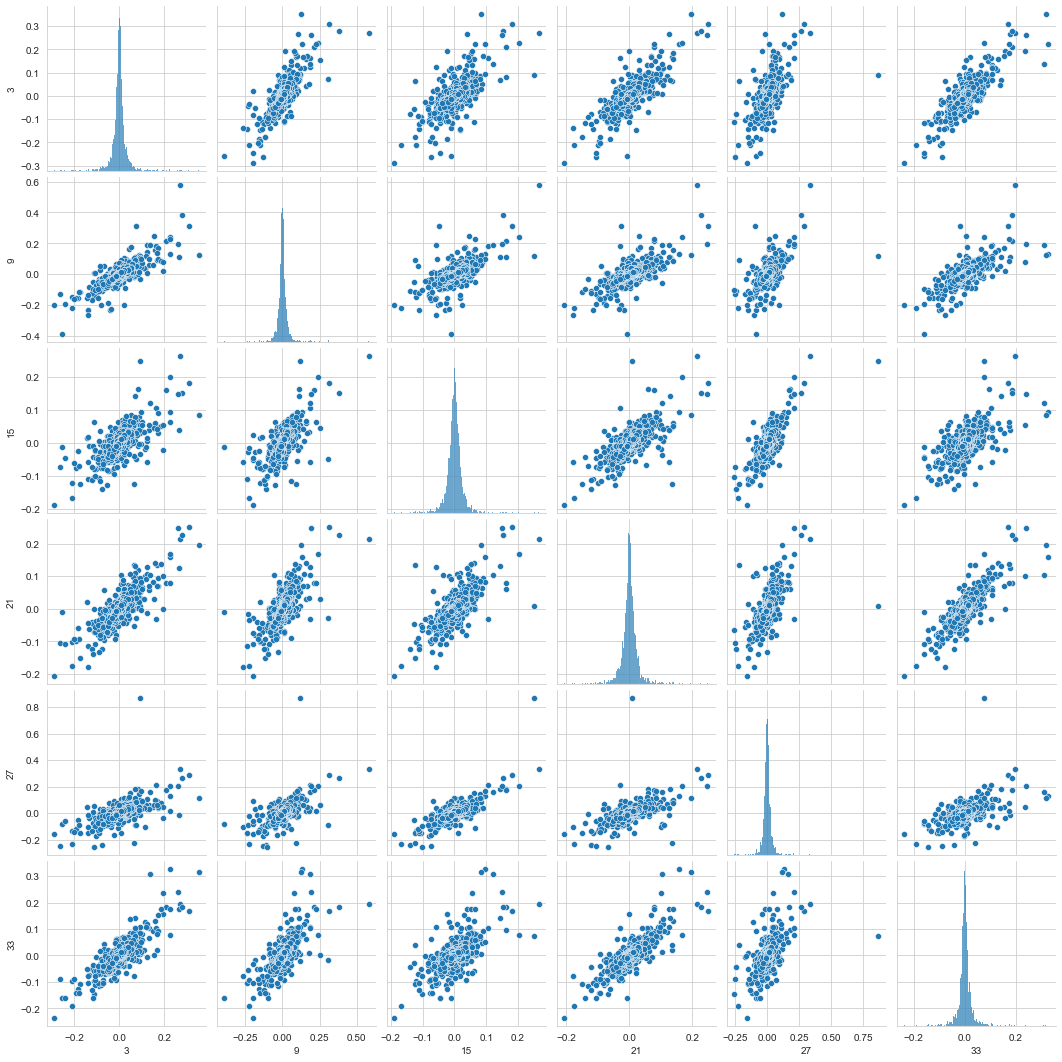

In [42]:
sns.pairplot(data=returns);

**Create a displot using seaborn of the 2015 returns for Morgan Stanley**

In [50]:
returns.dropna(inplace=True)

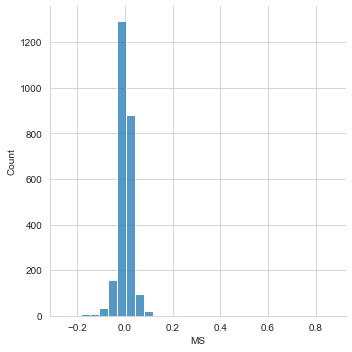

In [59]:
sns.displot(data=returns,x='MS',bins=30);

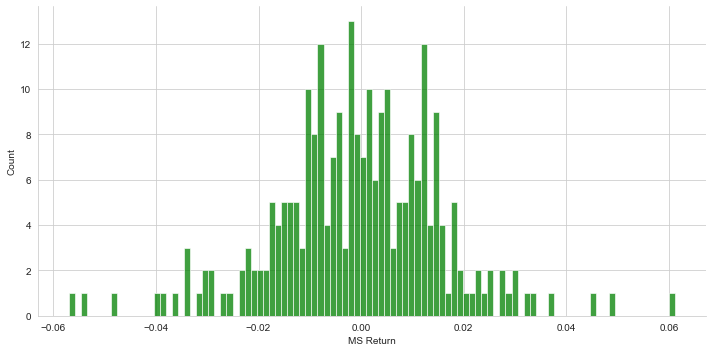

**Create a displot using seaborn of the 2008 returns for CitiGroup**

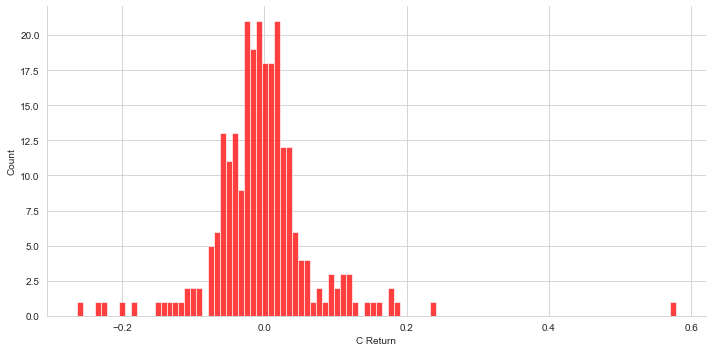

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

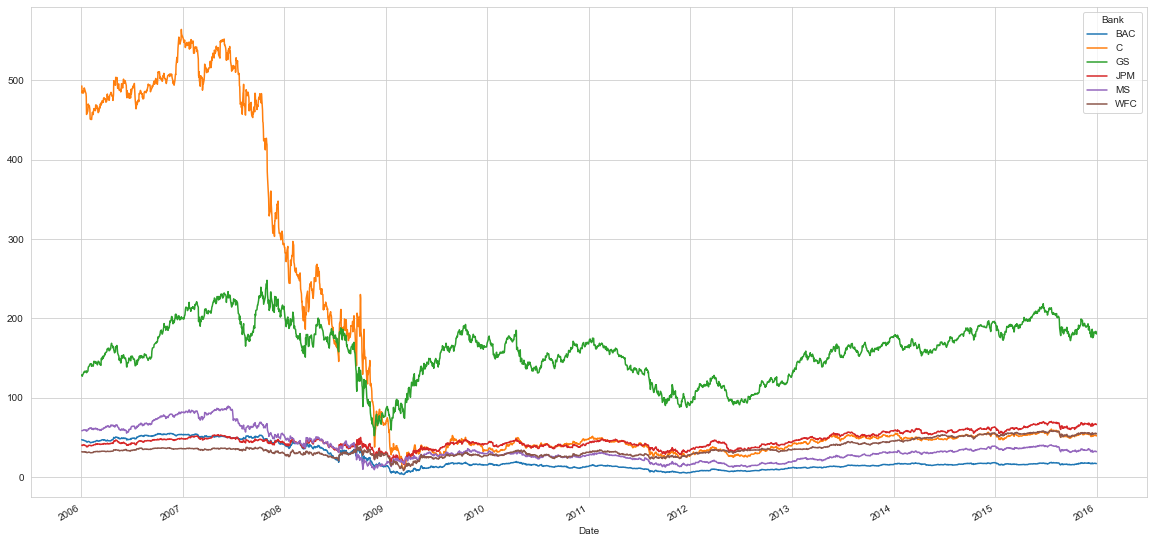

In [18]:
bank_stocks.xs(key='Close',level='Stocks',axis=1).plot(figsize=(20,10));

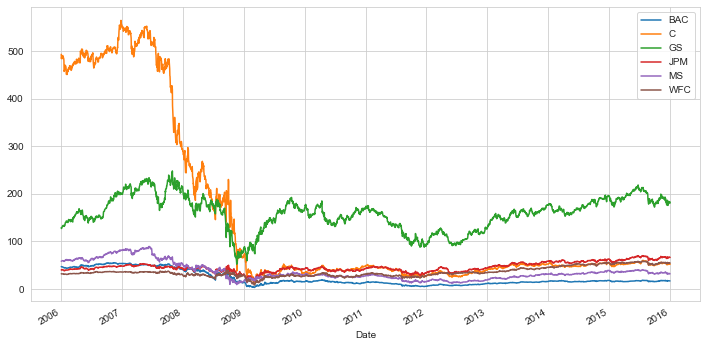

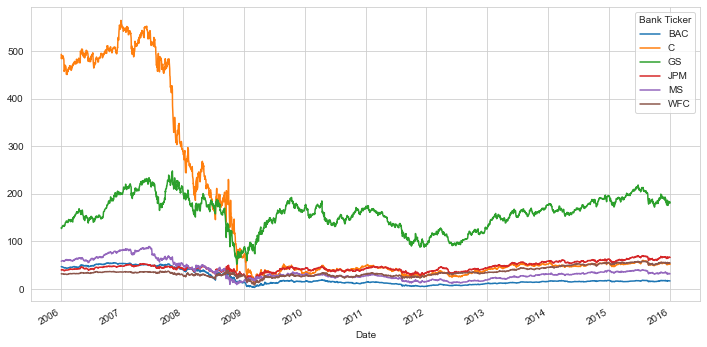

### using plotly

In [19]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [20]:
import cufflinks as cf

In [21]:
init_notebook_mode(connected=True)

In [22]:
cf.go_offline()

In [23]:
bank_stocks.xs(key='Close',level='Stocks',axis=1).iplot()

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

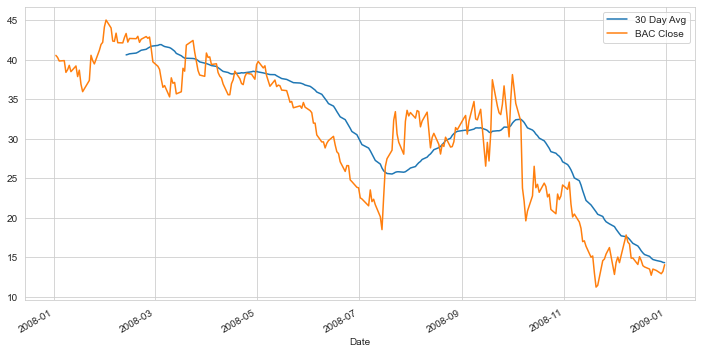

In [26]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend();

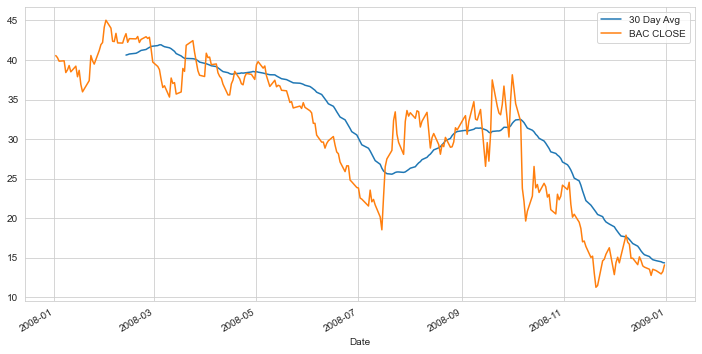

**Create a heatmap of the correlation between the stocks Close Price.**

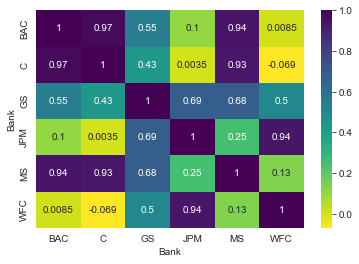

In [30]:
cor = bank_stocks.xs(key='Close',axis=1,level='Stocks').corr()
sns.heatmap(cor,annot=True,cmap='viridis_r');

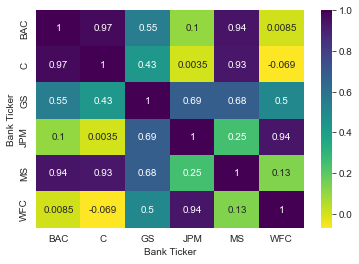

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [32]:
BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle');

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [36]:
MS['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma',period=[12,24,36])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [38]:
BAC['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll',period=[12,24]);